In [ ]:
                                        Census Income Prediction Documentation
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker.
    
This project uses a machine learning model to predict whether a person makes over $50K a year based on data from 
the 1994 Census Bureau database.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary Statistics:
                Age        Fnlwgt  Education_n

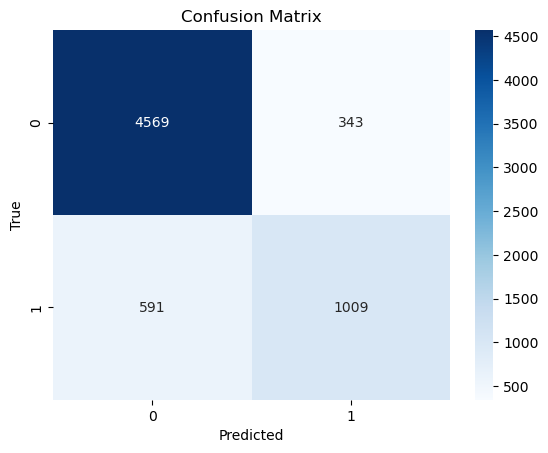

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Dataset
data_url = "https://github.com/dsrscientist/dataset1/raw/master/census_income.csv"
data = pd.read_csv(data_url)

# Step 2: Data Exploration
print("Dataset Information:")
print(data.info())  # Basic information about the dataset
print("\nSummary Statistics:")
print(data.describe())  # Summary statistics
print("\nMissing Values:")
print(data.isnull().sum())  # Checking for missing values

# Step 3: Data Preprocessing
# Remove any leading/trailing whitespaces in column names and values
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop rows with missing values (if any)
data = data.dropna()

# Encode categorical features using Label Encoding
le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

# Separate features (X) and target variable (y)
X = data.drop(['Income'], axis=1)  # Corrected: 'Income' is the target variable (capital 'I')
y = data['Income']

# Step 4: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Building - Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
The steps involved in the project are as follows:

Dataset Loading:
The dataset is loaded from a CSV file located at a GitHub URL.
Data Exploration:
Basic information about the dataset is displayed using data.info().
Summary statistics are generated using data.describe().
The presence of missing values is checked with data.isnull().sum().
Data Preprocessing:
Leading and trailing whitespaces are removed from column names and values.
Rows with missing values (if any) are dropped.
Categorical features are encoded using LabelEncoder to convert them into numerical values.
Feature Selection:
The target variable is identified as the Income column.
The remaining columns are used as features (X) for the model.
Data Splitting:
The dataset is split into training (80%) and testing (20%) sets using train_test_split.
Feature Scaling:
Features are scaled using StandardScaler to normalize the data.
Model Building:
A Random Forest Classifier is used to build the model, and it is trained on the training set.
Model Evaluation:
The model’s accuracy is calculated using accuracy_score.
A classification report and confusion matrix are displayed to analyze performance.
Visualization:

A heatmap of the confusion matrix is generated using seaborn to visualize the model’s predictions.

Finally, this implementation helps understand the demographic factors influencing income levels and predicts 
income categories based on those factors.
This script performs basic data analysis and builds a predictive model using Random Forest Classifier for the Census 
Income dataset.